In [30]:
%load_ext autoreload

%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import tcam_4t2m_180nm as tcam

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['figure.figsize'] = [4, 4]
cm = plt.cm.get_cmap('RdBu')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
matplotlib.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'figure.autolayout': False})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generate a random matrix of ones and zeros

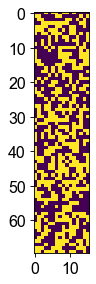

In [17]:
store_mat=np.random.rand(70,16)
store_mat[store_mat>=0.5]=1
store_mat[store_mat<0.5]=0
plt.imshow(store_mat)

loop over all rows, and check if all the search are correct

In [18]:
right=0
for i in range(store_mat.shape[0]):
    # search for vector stored at row i
    search_vect=store_mat[i,:]
    # use array function to retrieve all outputs. Array returns [i_ml,v_ml after t_clk,binary match]
    res_test=tcam.array(store_mat,search_vect,returnPerf=False)
    # if there is only a single match and in the correct row, right answer. Otherwise flag error
    if np.sum(np.asarray(res_test)[:,2])==1 and np.asarray(res_test)[i,2]==1:
        right=right+1
    else:
        print('Error at row '+str(i))

Sounds all the search were right! To retrieve also the energy metrics it is sufficient to Flag returnPerf

In [34]:
right=0
p_ml=0
p_wl=0
p_static=0
for i in range(store_mat.shape[0]):
    # search for vector stored at row i
    search_vect=store_mat[i,:]
    # use array function to retrieve all outputs. Array returns [i_ml,v_ml after t_clk,binary match][p_ml][p_wl][p_static]
    res_test=tcam.array(store_mat,search_vect,returnPerf=True)
    # power to charge/discharge match line
    p_ml=p_ml+res_test[1]
    # power to charge word line
    p_wl=p_wl+res_test[2]
    # static power consumption in the voltage divider
    p_static=p_static+res_test[3]
    # if there is only a single match and in the correct row, right answer. Otherwise flag error
    if np.sum(np.asarray(res_test[0])[:,2])==1 and np.asarray(res_test[0])[i,2]==1:
        right=right+1
    else:
        print('Error at row '+str(i))
print('Dynamic power to charge/discharge ML per search '+str(p_ml/store_mat.shape[0])[0:4]+' W')
print('Dynamic power to charge WL per search '+str(p_wl/store_mat.shape[0])[0:4]+' W')
print('Static power in the voltage divider per search '+str(p_static/store_mat.shape[0])[0:4]+' W')

Dynamic power to charge/discharge ML per search 0.12 W
Dynamic power to charge WL per search 0.02 W
Static power in the voltage divider per search 0.12 W


Technology and circuit paramters such as clock period after which sense the ML, conductance for HRS and LRS, and other are specified inside the tcam_4t2m_180nm function but can be specified also from above. For example, let's change the conductance values for LRS and HRS to increase the error probability by reducing HRS

In [35]:
right=0
r_lrs = 5e3
r_hrs = 10e3
for i in range(store_mat.shape[0]):
    # search for vector stored at row i
    search_vect=store_mat[i,:]
    # use array function to retrieve all outputs. Array returns [i_ml,v_ml after t_clk,binary match]
    res_test=tcam.array(store_mat,search_vect,returnPerf=False,r_low=r_lrs,r_high=r_hrs)
    # if there is only a single match and in the correct row, right answer. Otherwise flag error
    if np.sum(np.asarray(res_test)[:,2])==1 and np.asarray(res_test)[i,2]==1:
        right=right+1
    else:
        print('Error at row '+str(i))

Error at row 0
Error at row 1
Error at row 2
Error at row 3
Error at row 4
Error at row 5
Error at row 6
Error at row 7
Error at row 8
Error at row 9
Error at row 10
Error at row 11
Error at row 12
Error at row 13
Error at row 14
Error at row 15
Error at row 16
Error at row 17
Error at row 18
Error at row 19
Error at row 20
Error at row 21
Error at row 22
Error at row 23
Error at row 24
Error at row 25
Error at row 26
Error at row 27
Error at row 28
Error at row 29
Error at row 30
Error at row 31
Error at row 32
Error at row 33
Error at row 34
Error at row 35
Error at row 36
Error at row 37
Error at row 38
Error at row 39
Error at row 40
Error at row 41
Error at row 42
Error at row 43
Error at row 44
Error at row 45
Error at row 46
Error at row 47
Error at row 48
Error at row 49
Error at row 50
Error at row 51
Error at row 52
Error at row 53
Error at row 54
Error at row 55
Error at row 56
Error at row 57
Error at row 58
Error at row 59
Error at row 60
Error at row 61
Error at row 62
Er

As expected, with a resistance window of 2 most of the time an error occurs

Let's try to decrease the clock period to 1ps.

In [36]:
right=0
t_period=1e-12
for i in range(store_mat.shape[0]):
    # search for vector stored at row i
    search_vect=store_mat[i,:]
    # use array function to retrieve all outputs. Array returns [i_ml,v_ml after t_clk,binary match]
    res_test=tcam.array(store_mat,search_vect,returnPerf=False,t_clk=t_period)
    # if there is only a single match and in the correct row, right answer. Otherwise flag error
    if np.sum(np.asarray(res_test)[:,2])==1 and np.asarray(res_test)[i,2]==1:
        right=right+1
    else:
        print('Error at row '+str(i))

Error at row 0
Error at row 1
Error at row 2
Error at row 3
Error at row 4
Error at row 5
Error at row 6
Error at row 7
Error at row 8
Error at row 9
Error at row 10
Error at row 11
Error at row 12
Error at row 13
Error at row 14
Error at row 15
Error at row 16
Error at row 17
Error at row 18
Error at row 19
Error at row 20
Error at row 21
Error at row 22
Error at row 23
Error at row 24
Error at row 25
Error at row 26
Error at row 27
Error at row 28
Error at row 29
Error at row 30
Error at row 31
Error at row 32
Error at row 33
Error at row 34
Error at row 35
Error at row 36
Error at row 37
Error at row 38
Error at row 39
Error at row 40
Error at row 41
Error at row 42
Error at row 43
Error at row 44
Error at row 45
Error at row 46
Error at row 47
Error at row 48
Error at row 49
Error at row 50
Error at row 51
Error at row 52
Error at row 53
Error at row 54
Error at row 55
Error at row 56
Error at row 57
Error at row 58
Error at row 59
Error at row 60
Error at row 61
Error at row 62
Er

Again, all errors.

To test ternary function, don't care can be written in the memory, for example:

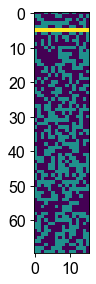

In [41]:
# add a row of don't cares
store_mat[5,:]=2*np.ones(16)
plt.imshow(store_mat)

In [44]:
# search and make sure that row 5 is alway matched
right=0
for i in range(store_mat.shape[0]):
    if i !=5:
        search_vect=store_mat[i,:]
        res_test=tcam.array(store_mat,search_vect,returnPerf=False)
        if np.sum(np.asarray(res_test)[:,2])==2 and np.asarray(res_test)[i,2]==1 and np.asarray(res_test)[5,2]==1:
            right=right+1
        else:
            print('Error at row '+str(i))

Sounds correct!